In [3]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
from scipy import stats
import cobra

In [11]:
#definir modelo 
model = cobra.io.read_sbml_model("../../recon3d_6rx.xml") #modelo recon3d + 6rx de acetilacion 
#matriz que contiene los datos del eje "y" -Estudio Shen
mat = scipy.io.loadmat('/home/bguzman/jupyter/UI/fba/supplementary_software_code.mat') #aqui se encuentra "acetlevellistval"
acetlevel=mat["acetlevellistval"] #acetlevellistval es la lista de valores de acetilacion (eje y)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [12]:
model

Name,Recon3D
Memory address,0x07f028baabfa0
Number of metabolites,5839
Number of reactions,10606
Number of groups,0
Objective expression,1.0*BIOMASS_maintenance - 1.0*BIOMASS_maintenance_reverse_5b3f9
Compartments,"cytosol, lysosome, mitochondria, endoplasmic reticulum, extracellular space, peroxisome/glyoxysome, nucleus, golgi apparatus, inner mitochondrial compartment"


In [13]:
#Aquí cargamos los archivos resultantes con los flujos provenientes de Pheflux como diccionario
A549= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/A549_LUNG_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HCT116= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HCT116_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HL60= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solved_To_Acceptable_Level.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MCF7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/MCF7_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MDAMB231= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/MDAMB231_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
NB4= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PANC1= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PANC1_PANCREAS_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PC3= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PC3_PROSTATE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SAOS2= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/SAOS2_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SW480= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/SW480_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U2OS= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U2OS_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U251MG= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U251MG_CENTRAL_NERVOUS_SYSTEM_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U937= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HUH7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HUH7_LIVER_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()

In [14]:
#Cada archivo contiene, llave:"Unnamed: 0"=nombre de la reaccion , clave:"0"=valor del flujo predicho de cada reaccion
#A549

In [15]:
#Donde se encuentran los flujos de interes "R_EX_glc y R_EX_PAC"
print(A549["Unnamed: 0"][5058])
print(A549["Unnamed: 0"][10604])

R_EX_glc__D_e
R_EX_PAC


In [16]:
A549["0"][5058]

0.13745475131598905

In [29]:
#Crear listas que contengan: archivo csv, nombre de lineas y listas con los flujos de interes
lista_csv=[A549,HCT116,HL60,HUH7,MCF7,MDAMB231,NB4,PANC1,PC3,SAOS2,SW480,U251MG,U2OS,U937]
lista_line=["A549","HCT116","HL60","HUH7","MCF7","MDAMB231","NB4","PANC1","PC3","SAOS2","SW480","U251MG","U2OS","U937"]
lista_glc_pred=[]
lista_PAC=[]

for name in lista_csv:
    lista_glc_pred.append(name["0"][5058]) #5058 lugar donde se encuentra el flujo R_EX_glc
    lista_PAC.append(name["0"][10604]) #10604 lugar donde se encuentra el flujo R_EX_PAC

print(lista_PAC)
print(lista_glc_pred)

[0.059057233043636435, 0.0545483478825664, 0.04759127143689707, 0.06461860663944446, 0.05154761904540172, 0.06264717746317773, 0.05327794566959319, 0.06496425390757278, 0.06164475098981365, 0.06376053314726629, 0.05857287040841513, 0.06273203423464323, 0.043558002833193186, 0.05692033478030083]
[0.13745475131598905, 0.17684545387653905, 0.18224816110825992, 0.13809289234485336, 0.20371135188064735, 0.15973230650874276, 0.1463925979677907, 0.10711428761859518, 0.13765945670659346, 0.14943933570157586, 0.16026131720220135, 0.13771840231019966, 0.10411631571745744, 0.1125510389670124]


In [18]:
print(MDAMB231["Unnamed: 0"][3691])
print(MDAMB231["0"][3691]) #Posición y clave RX galactosa

R_EX_gal_e
0.022960382448848262


In [19]:
print(SW480["Unnamed: 0"][3691])
print(SW480["0"][3691]) #Posición y clave RX galactosa

R_EX_gal_e
0.022490771360636624


In [20]:
dicc_medium={"DMEM":11.25,"RPMI":5,"L15":0,"IMM":11.25,"McCOY5A":7.5}
dicc_line_withmedium={"DMEM":["A549","HUH7","MCF7","PANC1","PC3","U251MG","U2OS"],"RPMI":["NB4","U937"],"L15":["MDAMB231","SW480"],"IMM":["HL60"],"McCOY5A":["HCT116","SAOS2"]}
dicc_gal={"MDAMB231":0.022960382448848262,"SW480":0.022490771360636624}

lista_glc_exp=[]
lista_gal_pred=[]

for names in lista_line:
    for medium,line in dicc_line_withmedium.items():
        for name in line:
            if names==name:
                lista_glc_exp.append(dicc_medium[medium])
            if names=="MDAMB231" or names=="SW480":
                if dicc_gal[names] not in lista_gal_pred:
                    lista_gal_pred.append(dicc_gal[names])
                
print(lista_glc_exp)                
print(lista_gal_pred)

[11.25, 7.5, 11.25, 11.25, 11.25, 0, 5, 11.25, 11.25, 7.5, 0, 11.25, 11.25, 5]
[0.022960382448848262, 0.022490771360636624]


In [21]:
#glc_exp*PAC/glc_pred
alfa=[] # si glc_exp/glc_pred = 0, alfa2 = (lista_gal_exp/lista_gal_pred) 
j=0
for i in range(14):
    glc_exp=lista_glc_exp[i]
    glc_pred=lista_glc_pred[i]
    calculated=((glc_exp/glc_pred))
    #print(i,calculated)
    if calculated==0:
        alfa.append(0.9/lista_gal_pred[j]) 
        j+=1
    else: 
        alfa.append(calculated)
print(alfa)
    
    

[81.84511551832675, 42.40991122811654, 61.729017903874606, 81.46690107631221, 55.22519926425737, 39.19795334442026, 34.15473233899504, 105.02800560143935, 81.7234083959679, 50.187589263493436, 40.016413202047005, 81.68842951474471, 108.0522291100787, 44.4242900455628]


In [22]:
#Multiplicar por el vector que contiene todas las predicciones de pheflux
def multiplicar_vector(lista,alfa):
    lista_vacia=[]
    for numero in lista:
        lista_vacia.append(numero*alfa)
    return lista_vacia



dicc_all={}
j=0
for name in lista_csv:
    all_fluxes=[]
    for i in name["0"]:
        all_fluxes.append(name["0"][i])
    dicc_all[lista_line[j]]=all_fluxes
    j+=1
        #for flux in range (len(lista_csv)):
            #all_fluxes.append(lista_csv[flux])


dicc_all_new={} 
pos=0
for i,k in dicc_all.items():
        dicc_all_new[lista_line[pos]]=multiplicar_vector(k,alfa[pos])
        pos+=1

#Multiplicando alfa por EX_glc__D_e 
for l,p in dicc_all_new.items():
    flux_glu= p[5058]
    print(flux_glu)





11.25
7.499999999999999
11.25
11.25
11.25
6.261179498126336
5.0
11.25
11.249999999999998
7.5
6.413083089467613
11.25
11.25
5.0


In [25]:
#Multiplicando alfa por EX_gal_e 
for l,p in dicc_all_new.items():
    flux_glu= p[3691]
    print(flux_glu)

4.307689621080561
2.18897955443088
2.8285140617541282
3.7584613925068484
4.203502814835019
0.9
1.5774281427917713
5.349078105477409
4.288870550911878
2.258235797482952
0.9000000000000001
4.216500050105873
5.7632502566567805
2.003424529032885


In [ ]:
#Haciendo la validación de las lineas 24 y 25. Los Alfa estan bien calculados.

In [27]:
#Multiplicando alfa por EX_PAC y guardando en una lista los valores
flux_PAC_final=[]
for l,p in dicc_all_new.items():
    flux_PAC_final.append(p[10604])
print(flux_PAC_final)

[4.833546060649168, 2.31339059134006, 2.9377624465963756, 5.2642776347847535, 2.846727533380338, 2.455641139361257, 1.819693973916475, 6.823066023297882, 5.037819160608287, 3.199987448816359, 2.3438761846930913, 5.124481356893206, 4.706539301709647, 2.52864546177062]


Coef. Pearson:
(0.8407007548880217, 0.0001658495667464713)


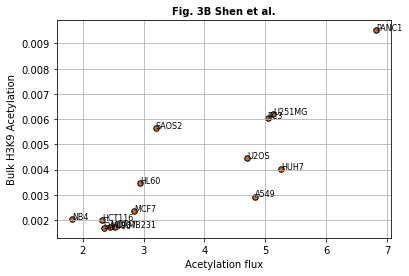

In [28]:
#RESULTADO CON MÉTODO SHEN (FIJANDO VALORES DE CADA MEDIO PARA LAS DIFERENTES LINEAS CELULARES)
x=flux_PAC_final
y=acetlevel[0,:]

plt.scatter(x,y,color="chocolate",edgecolors='black',s=30)
plt.title('Fig. 3B Shen et al.',fontsize = 10,fontweight = "bold")
plt.xlabel('Acetylation flux')
plt.ylabel('Bulk H3K9 Acetylation')

r=stats.pearsonr(x, y)

print("Coef. Pearson:")
print(r)

for i in range(14):
    plt.text(x[i],y[i],lista_line[i],fontsize = 8)
    



plt.grid()
plt.show()